In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

Accuracy: 0.8452380952380952


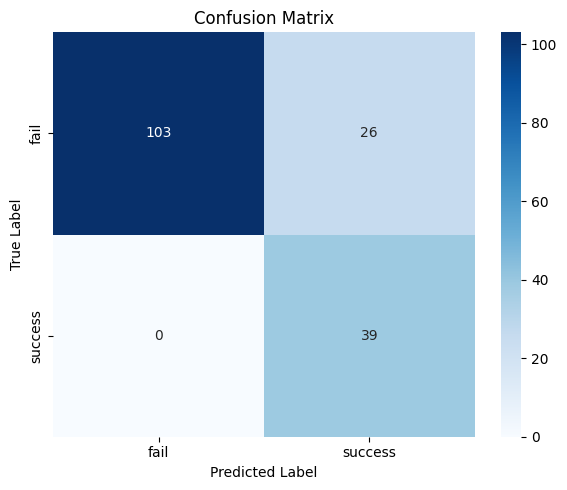

              precision    recall  f1-score     support
fail           1.000000  0.798450  0.887931  129.000000
success        0.600000  1.000000  0.750000   39.000000
accuracy       0.845238  0.845238  0.845238    0.845238
macro avg      0.800000  0.899225  0.818966  168.000000
weighted avg   0.907143  0.845238  0.855911  168.000000


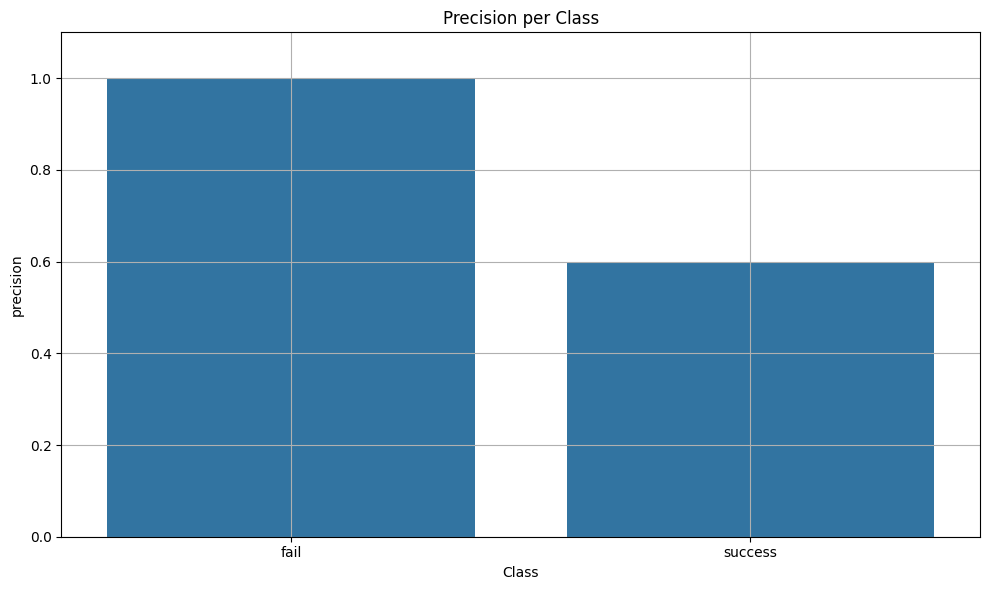

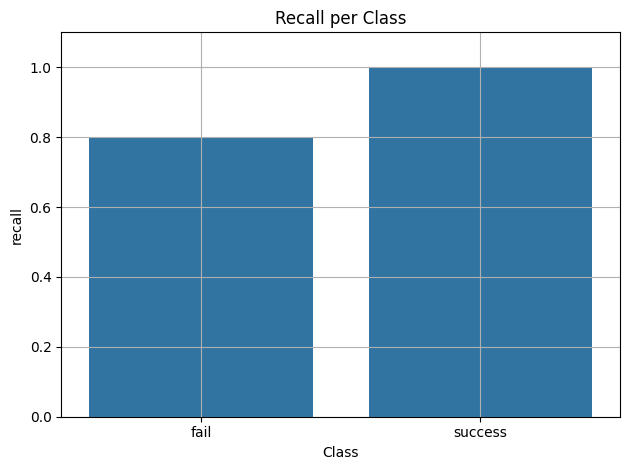

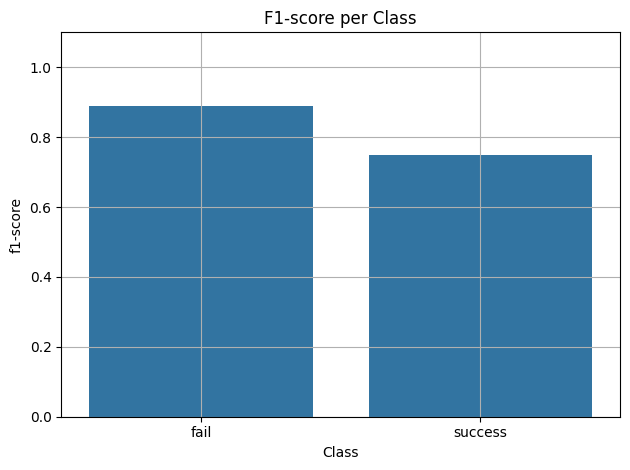

In [14]:
train_csv_path = "../Data_Preprocessing/Preprocessed_Dataset/train_dataset.csv"
test_csv_path = "../Data_Preprocessing/Preprocessed_Dataset/test_dataset.csv"
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)


# === 2. 提取特征和标签 ===

# === 2. 分离特征和标签 ===
X_train = train_df[['jx', 'alpha', 'beta']].values
X_test = test_df[['jx', 'alpha', 'beta']].values

le = LabelEncoder()
y_train = le.fit_transform(train_df['result'])
y_test = le.transform(test_df['result'])

# === 3. 特征缩放（标准化） ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === 4. 定义 SVM 模型（加 class_weight）===
model = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced')
model.fit(X_train, y_train)

# === 5. 预测 + 评估 ===
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

# === 混淆矩阵 ===
cm = confusion_matrix(y_test, y_pred)
labels = le.classes_ if 'le' in locals() else ['class 0', 'class 1']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# === 分类报告转 DataFrame 表格 ===
report = classification_report(y_test, y_pred, target_names=labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df)

# === 可选：可视化 precision/recall/f1-score ===
metrics = ['precision', 'recall', 'f1-score']
report_df_classes = report_df.loc[labels, metrics].reset_index().rename(columns={'index': 'Class'})

plt.figure(figsize=(10, 6))
for metric in metrics:
    sns.barplot(x='Class', y=metric, data=report_df_classes)
    plt.title(f'{metric.capitalize()} per Class')
    plt.ylim(0, 1.1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

